# which machine learning models are sensitive to outliers?
1.Naviye Bayes classifier----not sensitive to outliers
2.SVM------------------------non-sens
3.lINEAR REGRESSION----------sens(Remove outliers)
4.Logistic Regression--------sens
5.Decision Tree Regressor or classifier----not sens
6.Ensemble(RF,XGBoost, GB)--------not sens
7.KNN-----------------------------not sens
8.Kmeans--------------------------sens
9.Hierarichal---------------------sens
10.PCA----------------------------sens
11.Neural Networks----------------sens

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import seaborn as sns

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_17712\315930958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

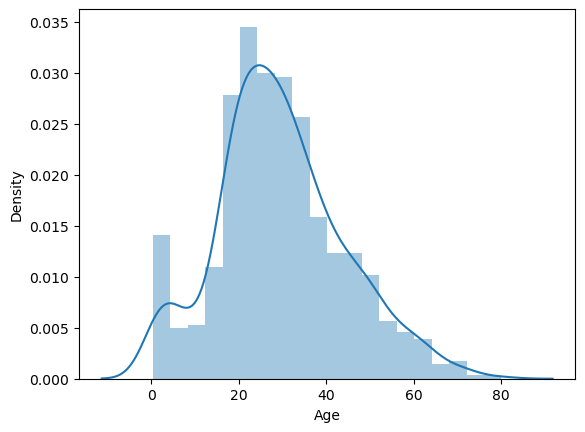

In [8]:
sns.distplot(df['Age'].dropna())

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_17712\827162487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

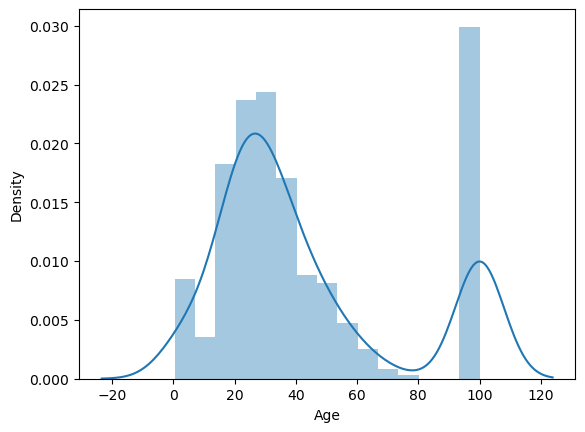

In [9]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passanger')

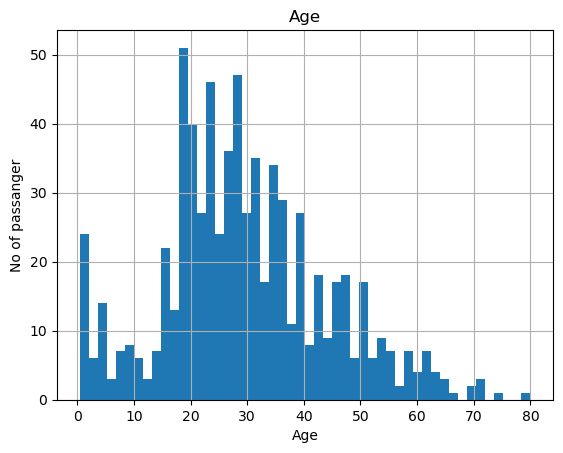

In [11]:
#Guassian deviation
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passanger')

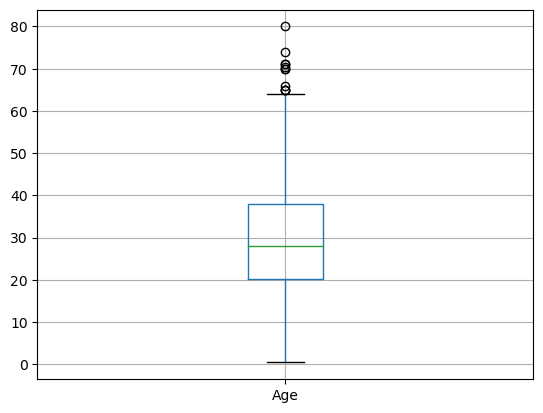

In [12]:
figure=df.boxplot(column='Age')

In [13]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
####Assuming age follows a guassian distribution we will calculate the boundries which differentiates the outliers 

In [18]:
uppar_boundary=df['Age'].mean() + 3*df['Age'].std()
lower_boundary=df['Age'].mean() - 3*df['Age'].std()
print(uppar_boundary)
print(lower_boundary)
print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


In [19]:
###lets compute the interquantile range to calculate the boundaries
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [20]:
IQR

17.875

In [21]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-6.6875
64.8125


In [ ]:
##Extreme Outliers
lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

####Feature is skewed

Text(0, 0.5, 'No of passanger')

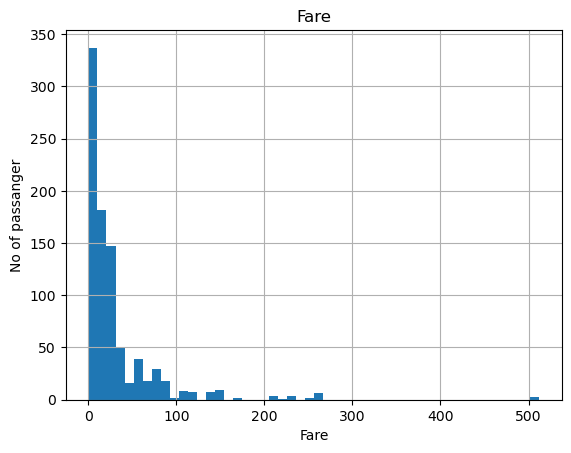

In [23]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passanger')

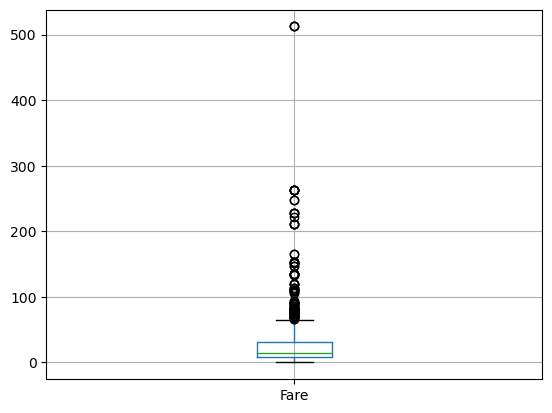

In [24]:
figure=df.boxplot(column='Fare')

In [25]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
###lets compute the interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [27]:
##Extreme Outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688
